Starting off with imports and loading data in

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow-text
!pip install --upgrade tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 9.7 MB/s 
     |████████████████████████████████| 588.3 MB 18 kB/s 
     |████████████████████████████████| 1.7 MB 42.8 MB/s 
     |████████████████████████████████| 439 kB 61.0 MB/s 
     |████████████████████████████████| 6.0 MB 55.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.1

In [ ]:
!pip install -U nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import tensorflow_text as text
import tensorflow.keras.layers as layers
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras.losses as loss

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
tweets_downloaded = drive.CreateFile({'id':'1PXX2R19Jb3eGAPpcvno5IMxBrxwNCE59'})
tweets_downloaded.GetContentFile('twitter.csv') 

In [ ]:
tweets = pd.read_csv('twitter.csv')

In [ ]:
tweets.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
tweets.info()
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


### Basic Cleaning 

In [ ]:
def hate_speech(x):
  if x == 0:
    return 0
  return 1

tweets['y'] = tweets['hate_speech'].map(hate_speech)

NameError: ignored

In [ ]:
text = tweets['tweet']
text

In [ ]:
text_lowercase = text.str.lower()
text_lowercase

In [ ]:
def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct


text_no_punct = text_lowercase.apply(remove_punctuation)
text_no_punct

In [ ]:
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit


text_no_digit = text_no_punct.apply(remove_digit)
text_no_digit

In [ ]:
text_tokenized = text_no_digit.apply(word_tokenize)
text_tokenized.head()

In [ ]:
stop_words = set(stopwords.words('english'))
#stop_words

In [ ]:
def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words


text_no_stop = text_tokenized.apply(remove_stopwords)
text_no_stop

In [ ]:
porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document



text_stemmed = text_no_stop.apply(stemmer)
text_stemmed

### Detokenization 

In [ ]:
text_detokenized = text_stemmed.apply(TreebankWordDetokenizer().detokenize)
text_detokenized

0        rt mayasolov woman shouldnt complain clean hou...
1        rt mleew boy dat coldtyga dwn bad cuffin dat h...
2        rt urkindofbrand dawg rt sbabylif ever fuck bi...
3                   rt cganderson vivabas look like tranni
4        rt shenikarobert shit hear might true might fa...
                               ...                        
24778    you muthafin lie lifeask pearl coreyemanuel ri...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl ntac eileen dahlia beauti color combin p...
Name: tweet, Length: 24783, dtype: object

In [ ]:
countvec = CountVectorizer()

sparse_dtm = countvec.fit_transform(text_detokenized)
sparse_dtm

<24783x31717 sparse matrix of type '<class 'numpy.int64'>'
	with 209440 stored elements in Compressed Sparse Row format>

In [ ]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=tweets.index)
dtm

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaaaaand,aaadontplayi,aaahhhhh,aahahah,aaliyah,aaliyahhhm,aaliyahhlove,aamaadmiparti,aampt,...,zulu,zvckslvtr,zwaaad,zwengersierra,zwhite,zwithr,zzachbar,zzzentropi,zzzquil,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequencies = dtm.sum().sort_values(ascending=False)
print(frequencies[frequencies > 50])

bitch      11332
rt          7618
hoe         4287
like        2854
fuck        2251
           ...  
america       51
uncl          51
door          51
unless        51
bye           51
Length: 566, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


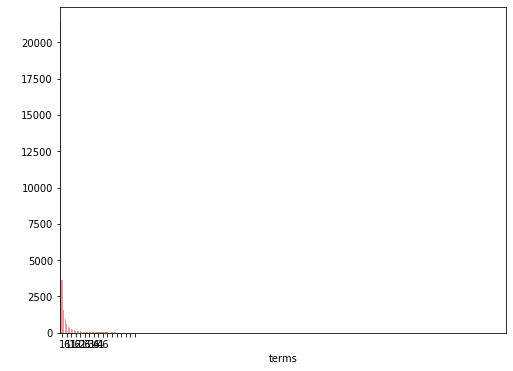

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.countplot(frequencies)
plt.xticks(np.arange(1, 50, step=3), np.arange(1, 50, step=5))

# freq = pd.DataFrame(frequencies, columns=['Frequencies']).transpose()
# ax = sns.countplot(freq)
# ax = sns.distplot(frequencies, bins=len(frequencies))
# ax = plt.hist(frequencies[frequencies > 50])

plt.xlabel('terms')
plt.ylabel(' ')
plt.show()

In [ ]:
# 0.5% of the tweets or more (appears in 6 or more):

countvec2 = CountVectorizer(min_df=0.005)
sparse_dtm2 = countvec2.fit_transform(text_detokenized)

dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=tweets.index)
dtm2.sum().sort_values(ascending=False) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


bitch      11332
rt          7618
hoe         4287
like        2854
fuck        2251
           ...  
home         131
tonight      129
pleas        128
cut          127
doesnt       126
Length: 225, dtype: int64

In [ ]:
# Now, let's try with 1% of the tweets or more (appears in 12 or more):

countvec3 = CountVectorizer(min_df=0.01)
sparse_dtm3 = countvec3.fit_transform(text_detokenized)

dtm3 = pd.DataFrame(sparse_dtm3.toarray(), columns=countvec3.get_feature_names(), index=tweets.index)
dtm3.sum().sort_values(ascending=False)

bitch      11332
rt          7618
hoe         4287
like        2854
fuck        2251
           ...  
use          264
dumb         259
yellow       259
twitter      255
thing        254
Length: 105, dtype: int64

### Supervised Learning With Text

In [ ]:
y = tweets['y']
X = dtm3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((17348, 105), (7435, 105))

# Random Forest w/ CV

In [ ]:
grid_values = {'max_features': np.linspace(1,105,5, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=3)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 435.98 s


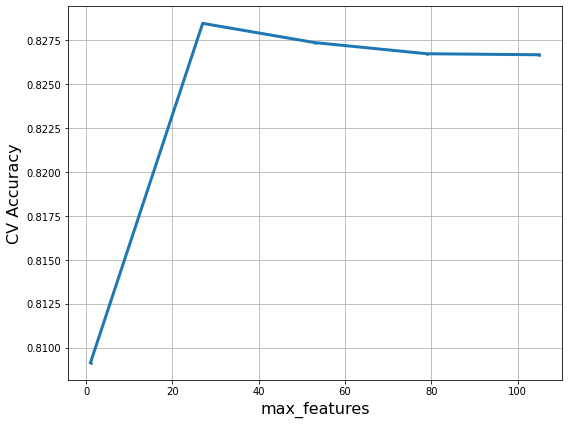

Best parameters {'max_features': 27, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [ ]:
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [ ]:
y_pred = rf_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix: 
 [[5713  224]
 [1063  435]]

Accuracy: 0.8268997982515132


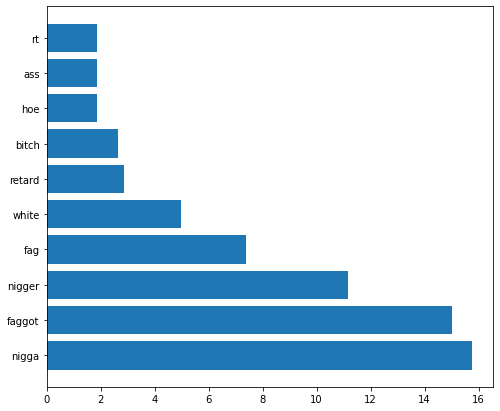

In [ ]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.show()

# Logistic Regression 

In [ ]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=88)

In [ ]:
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[5750  187]
 [1069  429]]

Accuracy: 0.8310692669804977


In [ ]:
#on the training set 
y_prob = logreg.predict_proba(X_train)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_train.index)

cm = confusion_matrix(y_train, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_train, y_pred))

Confusion Matrix: 
 [[13422   431]
 [ 2489  1006]]

Accuracy: 0.8316808854046576


# Descion Tree w/CV

In [ ]:
grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=3).fit(X_train, y_train)

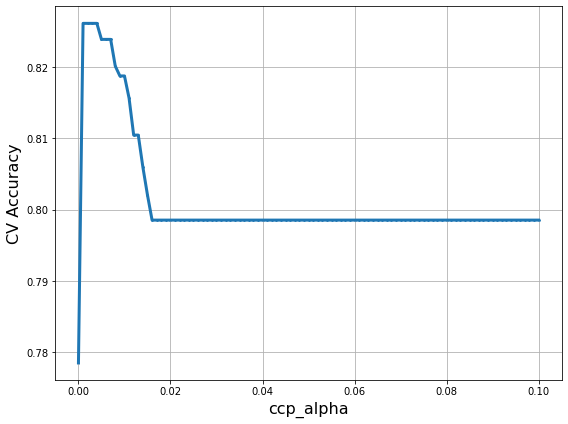

Best ccp_alpha {'ccp_alpha': 0.001}


In [ ]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 17


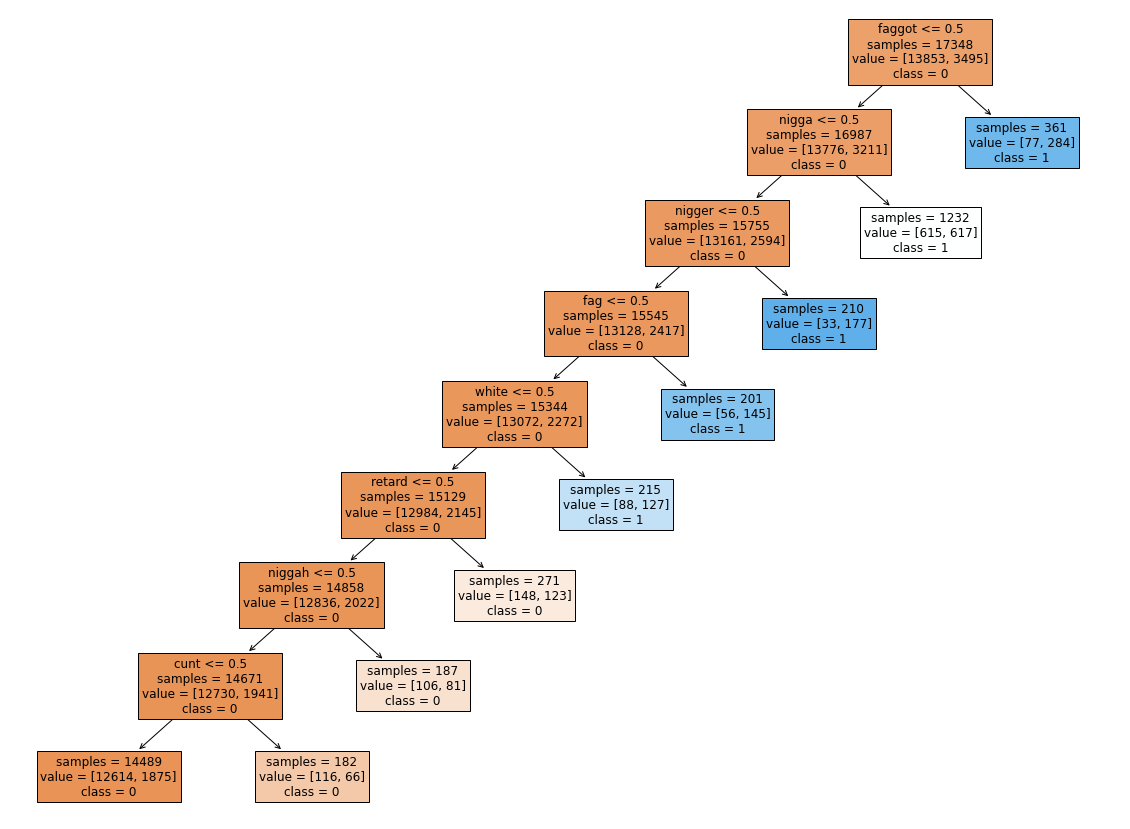

In [ ]:
from sklearn.tree import plot_tree
print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(20,15))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [ ]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[5571  366]
 [ 918  580]]

Accuracy: 0.8273032952252858


# Gradient Boosting Classifier with CV


In [ ]:
grid_values = {'n_estimators': np.linspace(1, 105, 5, dtype='int32'),
               'learning_rate': [0.01],
               'max_leaf_nodes': np.linspace(2, 10, 8, dtype='int32'),
               'max_depth': [30],
               'min_samples_leaf': [5],
               'random_state': [88]} 

tic = time.time()

gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=5)
gbc_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 452.02 s


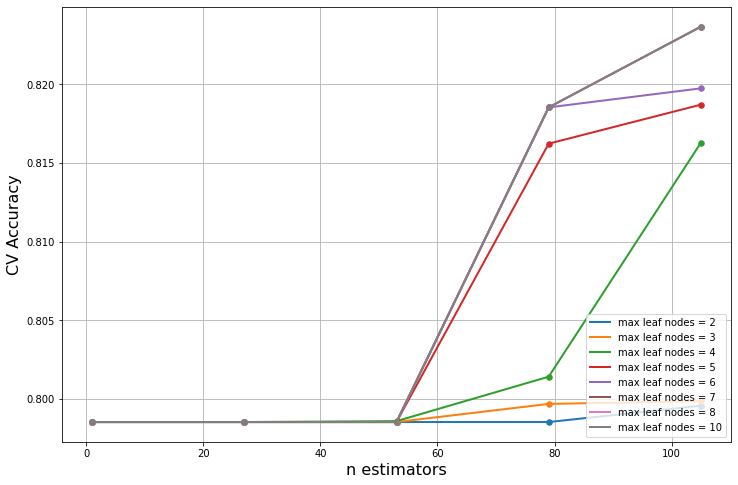

In [ ]:
n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
cv_acc_scores = gbc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], cv_acc_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred = gbc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[5877   60]
 [1235  263]]

Accuracy: 0.8258238063214526


### Linear Discriminant Analysis


In [ ]:
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.830
Config: {'shrinkage': 0.06}


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[5693  244]
 [1021  477]]

Accuracy: 0.8298587760591796


### BERT MODEL

Although this isn't a high quality Bert Model, it took some time to grasp transformers, how it uses layers, and how it differs from other Transformer based models.
This Bert Model isn't as accurate as other models because hyperparameters could be improved as well as the low data size and low number of epochs(due to colab restrictions as well as running out of GPU runtime). Also layers can be improved upon.



In [ ]:
BERT_pre = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
BERT_enc = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')


In [ ]:
BERT_input = layers.Input(shape = (), dtype = tf.string, name = 'tweet')
pooled_output = BERT_enc(BERT_pre(BERT_input))
dropout_layer = layers.Dropout(.15, name = 'dropout')(pooled_output['pooled_output'])
dense_layer = layers.Dense(1, activation = "sigmoid", name ='output')(dropout_layer)
BERTmodel = tf.keras.Model(inputs = [BERT_input], outputs = [dense_layer])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
tweets_lower = tweets
tweets_lower['tweet'] = tweets_lower['tweet'].apply(str.lower)

In [ ]:
tweets_lower['tweet'] = tweets_lower['tweet'].apply(remove_punctuation)

In [ ]:
tweets_lower['tweet'] = tweets_lower['tweet'].apply(remove_digit)

In [ ]:
tweets_shuffled = tweets_lower.sample(frac=1, random_state = 88)
tweets_shuffled_pos = tweets_shuffled.loc[tweets_shuffled['y'] == 1][:500]
tweets_shuffled_neg = tweets_shuffled.loc[tweets_shuffled['y'] == 0][:500]
tweets_shuffled_bal = pd.concat([tweets_shuffled_pos, tweets_shuffled_neg])
tweets_shuffled_bal = tweets_shuffled_bal.sample(frac=1, random_state = 88)
train_Bert, test_Bert = train_test_split(tweets_shuffled_bal, test_size=0.2)

In [ ]:
BERTmodel.compile(optimizer = 'Ftrl', loss = loss.MeanSquaredError(), metrics = ['accuracy'])
BERTmodel.fit(train_Bert['tweet'], train_Bert['y'], epochs = 1)

25/25 [==============================] - 355s 14s/step - loss: 0.2523 - accuracy: 0.4913


In [ ]:
BERTmodel.evaluate(test_Bert['tweet'], test_Bert['y'])

7/7 [==============================] - 95s 13s/step - loss: 0.2651 - accuracy: 0.5050


[0.2650551497936249, 0.5049999952316284]

### CYBERBULLYING DATASET

In [ ]:
cyberbullying = pd.read_csv('cyberbullying_tweets.csv')

In [ ]:
cyberbullying.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [ ]:
def cyberbullying_label(x):
  if x == "not_cyberbullying":
    return 0
  else:
    return 1

In [ ]:
cyberbullying['y'] = cyberbullying['cyberbullying_type'].apply(cyberbullying_label)

In [ ]:
cyberbullying_shuffled = cyberbullying.sample(frac=1, random_state = 88)
cyberbullying_shuffled.head(10)

In [ ]:
texts = cyberbullying_shuffled['tweet_text']
texts_lowercase = texts.str.lower()
texts_lowercase
texts_no_punct = texts_lowercase.apply(remove_punctuation)
texts_no_punct
texts_no_digit = texts_no_punct.apply(remove_digit)
texts_no_digit
texts_tokenized = texts_no_digit.apply(word_tokenize)
texts_no_stop = texts_tokenized.apply(remove_stopwords)
texts_stemmed = texts_no_stop.apply(stemmer)
texts_detokenized = texts_stemmed.apply(TreebankWordDetokenizer().detokenize)
texts_detokenized

4124     els feel karma go come back bite kat bum nasty...
12828    gotta love good gay rape joke less thn minut g...
23181    kaya faianh least dont follow pedophil prophet...
22362    joke belong religion introduc terror whole wor...
9556     yolomastar like rape gay joke funni hell proba...
                               ...                        
42558    wank thoma drag back k lore past month daili p...
24938    rt riconastyy hole hole bitch mad way texa u d...
2481     moment teammat told wrong time show school got...
36815    might complet rude ’ someth satisfi watch girl...
39200    gen z teenag next level saw high school girl b...
Name: tweet_text, Length: 47692, dtype: object

In [ ]:
sparse_cyber = countvec3.transform(texts_detokenized)

cyber_dtm = pd.DataFrame(sparse_cyber.toarray(), columns=countvec3.get_feature_names(), index=cyberbullying.index)
y_cyber = cyberbullying['y']
X_cyber = cyber_dtm
yc_pred = logreg.predict(X_cyber)
cm = confusion_matrix(y_cyber, yc_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_cyber, yc_pred))

Confusion Matrix: 
 [[ 6787  1158]
 [33875  5872]]

Accuracy: 0.26543235762811374


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ethnicity_shuffled = cyberbullying_shuffled.loc[cyberbullying_shuffled['cyberbullying_type'] == 'ethnicity']
texts = ethnicity_shuffled['tweet_text']
texts_lowercase = texts.str.lower()
texts_lowercase
texts_no_punct = texts_lowercase.apply(remove_punctuation)
texts_no_punct
texts_no_digit = texts_no_punct.apply(remove_digit)
texts_no_digit
texts_tokenized = texts_no_digit.apply(word_tokenize)
texts_no_stop = texts_tokenized.apply(remove_stopwords)
texts_stemmed = texts_no_stop.apply(stemmer)
texts_detokenized = texts_stemmed.apply(TreebankWordDetokenizer().detokenize)
texts_detokenized

42907    pl keep stream one ’ thank u guy enough run mu...
45054    lastnamejon fck testicl form cum guzzler rt ta...
42116    damn u still school ’ decid ’ dumb fuck smart ...
45263    black commun deepli trigger anyth forc us star...
44569    school downplay blatant racism refer racist st...
                               ...                        
46682    tri rememb anyth happen day past caus anxieti ...
39812              peopl think fuck stupid nigger ant dumb
45602    cc mpanzthabiso lindodimpl sihlesiph bro nigge...
40801    nice one huge fan ur sitcom never comedi kinda...
42558    wank thoma drag back k lore past month daili p...
Name: tweet_text, Length: 7961, dtype: object

In [ ]:
sparse_cyber = countvec3.transform(texts_detokenized)

cyber_dtm = pd.DataFrame(sparse_cyber.toarray(), columns=countvec3.get_feature_names(), index=ethnicity_shuffled.index)
y_cyber = ethnicity_shuffled['y']
X_cyber = cyber_dtm
yc_pred = logreg.predict(X_cyber)
print ("\nAccuracy:", accuracy_score(y_cyber, yc_pred))


Accuracy: 0.7821881673156639


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


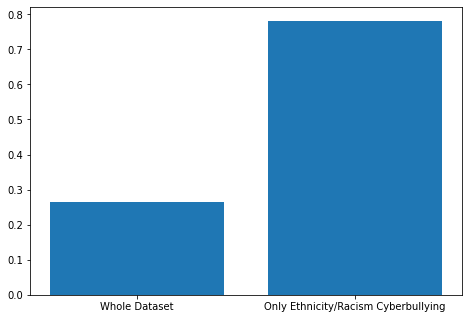

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
title = ['Whole Dataset', 'Only Ethnicity/Racism Cyberbullying']
vall = [0.26543235762811374,0.7821881673156639 ]
ax.bar(title,vall)
plt.show()